<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/3_4_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_AND_%EC%97%B0%EC%82%B0(%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_1_x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
%tensorflow_version 1.x

In [54]:
import tensorflow as tf

In [55]:
tf.enable_eager_execution()

In [56]:
tf.__version__

'1.15.2'

In [57]:
import numpy as np

In [58]:
X = np.array(
    [
     [0, 0],
     [0, 1],
     [1, 0],
     [1, 1]
    ], dtype='float32'
)

In [59]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [60]:
y = np.array([
      [0],
      [0],
      [0],
      [1], 
    ], dtype='float32'
)

In [61]:
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [62]:
w = tf.Variable([
                 [1], [2]
], dtype='float32')

In [63]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

In [64]:
b = tf.Variable([3], dtype='float32')

In [65]:
# X 배열 곱하기 w 배열
# 타입 지정 안하면 에러남
tf.matmul(X, w)

<tf.Tensor: id=634, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [2.],
       [1.],
       [3.]], dtype=float32)>

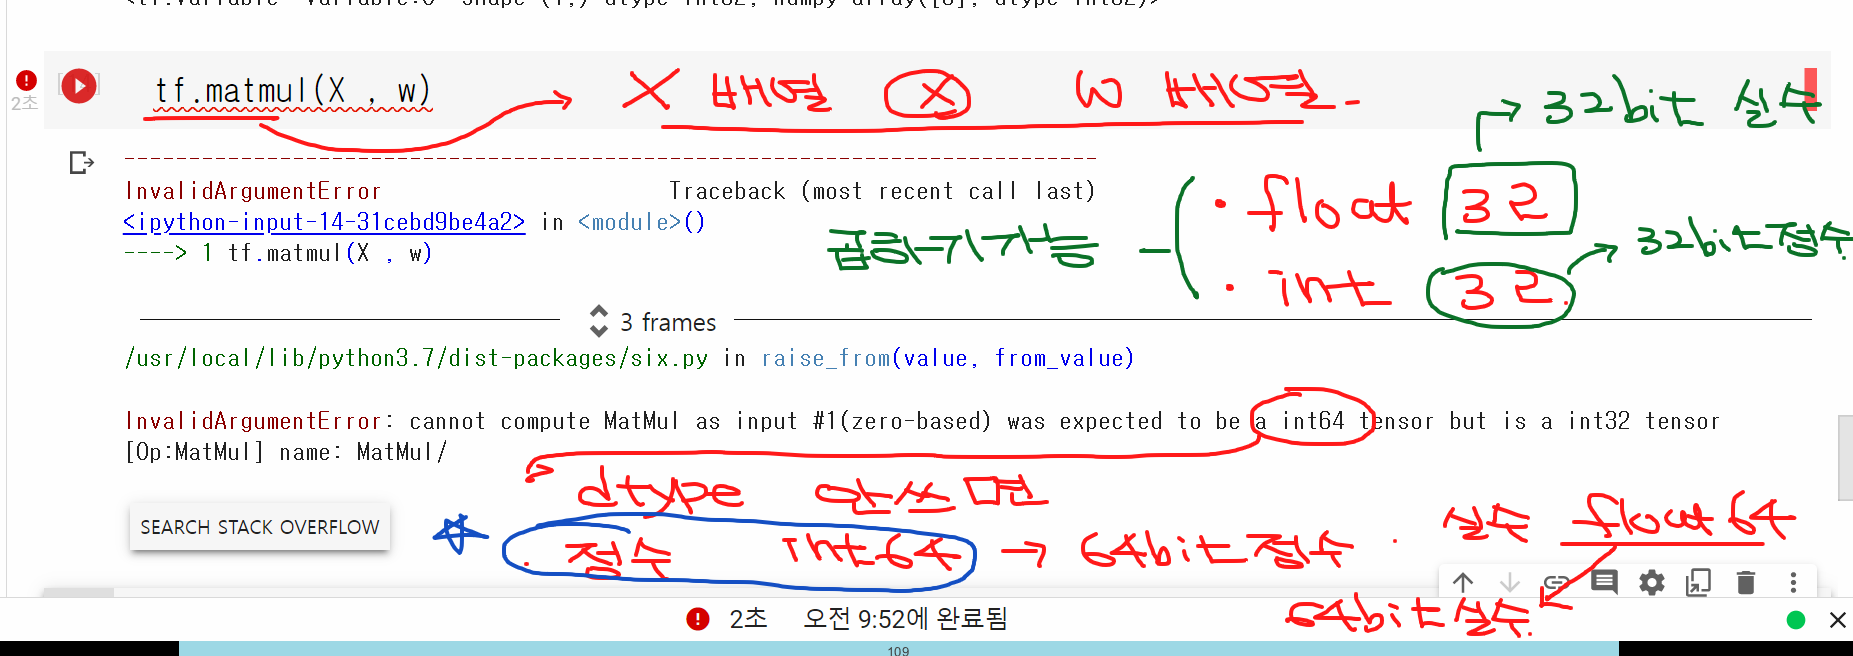

In [66]:
tf.matmul(X, w)+b

<tf.Tensor: id=639, shape=(4, 1), dtype=float32, numpy=
array([[3.],
       [5.],
       [4.],
       [6.]], dtype=float32)>

In [67]:
# sigmoid 계산
tf.sigmoid(tf.matmul(X, w) + b)

<tf.Tensor: id=645, shape=(4, 1), dtype=float32, numpy=
array([[0.95257413],
       [0.9933072 ],
       [0.98201376],
       [0.9975274 ]], dtype=float32)>

In [68]:
# W와 b값을 자동으로 수정하는 옵티마이저 객체를 생성
optimizer = tf.train.AdamOptimizer(0.01)

In [69]:
with tf.GradientTape() as tape:
  print(
        "tf.sigmoid(tf.matmul(X, w) + b)= ", 
        tf.sigmoid(tf.matmul(X, w) + b)
      )

tf.sigmoid(tf.matmul(X, w) + b)=  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)


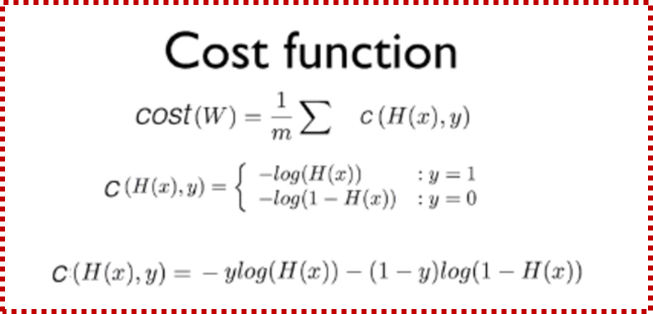

In [70]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)

  # reduce_mean()으로 계산할 수 있음
  print(
      "np.sum(-y * tf.log(hypothesis) - (1-y) * tf.log(1-hypothesis)) / 4 = ",
      np.sum( -y * tf.log(hypothesis) - (1-y) * tf.log(1-hypothesis) ) / 4 
  )

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
np.sum(-y * tf.log(hypothesis) - (1-y) * tf.log(1-hypothesis)) / 4 =  3.0189826488494873


In [71]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)

  cost = -tf.reduce_mean( y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis) )
  print("cost = ", cost )

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)


In [72]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)

  cost = -tf.reduce_mean( y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis) )
  print("cost = ", cost)

  # w, b의 기울기 계산
  print(
        "tape.gradient(cost, [w,b]) = ",
        tape.gradient(cost, [w,b])
        )

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)
tape.gradient(cost, [w,b]) =  [<tf.Tensor: id=735, shape=(2, 1), dtype=float32, numpy=
array([[0.2448853 ],
       [0.24770865]], dtype=float32)>, <tf.Tensor: id=734, shape=(1,), dtype=float32, numpy=array([0.7313556], dtype=float32)>]


In [73]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)

  cost = -tf.reduce_mean( y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis) )
  print("cost = ", cost)

  # w, b의 기울기 계산
  grads = tape.gradient(cost, [w,b])
  print("grads = ", grads)

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)
grads =  [<tf.Tensor: id=786, shape=(2, 1), dtype=float32, numpy=
array([[0.2448853 ],
       [0.24770865]], dtype=float32)>, <tf.Tensor: id=785, shape=(1,), dtype=float32, numpy=array([0.7313556], dtype=float32)>]


In [74]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)

  cost = -tf.reduce_mean( y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis) )
  print("cost = ", cost)

  # w, b의 기울기 계산
  grads = tape.gradient(cost, [w,b])
  print("grads = ", grads)

  print("업데이트 전의 w = ", w)
  print("업데이트 전의 b = ", b)

  # grads에 저장된 w의 기울기와 b의 기울기를 w와 b에서 빼주고
  # 새로운 w와 b로 업데이트
  optimizer.apply_gradients(grads_and_vars=zip(grads,[w,b]))

  print("업데이트 후의 w = ", w)
  print("업데이트 후의 b = ", b)

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)
grads =  [<tf.Tensor: id=837, shape=(2, 1), dtype=float32, numpy=
array([[0.2448853 ],
       [0.24770865]], dtype=float32)>, <tf.Tensor: id=836, shape=(1,), dtype=float32, numpy=array([0.7313556], dtype=float32)>]
업데이트 전의 w =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>
업데이트 전의 b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>
업데이트 후의 w =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.99],
       [1.99]], dtype=float32)>
업데이트 후의 b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.99], dtype=float32)>


In [80]:
for step in range(1000):
  with tf.GradientTape() as tape:
    hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
    print("hypothesis = ", hypothesis)

    cost = -tf.reduce_mean( y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis) )
    print("cost = ", cost)

    # w, b의 기울기 계산
    grads = tape.gradient(cost, [w,b])
    print("grads = ", grads)

    print("업데이트 전의 w = ", w)
    print("업데이트 전의 b = ", b)

    # grads에 저장된 w의 기울기와 b의 기울기를 w와 b에서 빼주고
    # 새로운 w와 b로 업데이트
    optimizer.apply_gradients(grads_and_vars=zip(grads,[w,b]))

    print("업데이트 후의 w = ", w)
    print("업데이트 후의 b = ", b)

    print("="*100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.5693451 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(0.39994133, shape=(), dtype=float32)
grads =  [<tf.Tensor: id=59335, shape=(2, 1), dtype=float32, numpy=
array([[-0.02174202],
       [-0.02111177]], dtype=float32)>, <tf.Tensor: id=59334, shape=(1,), dtype=float32, numpy=array([0.1081557], dtype=float32)>]
업데이트 전의 w =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.91493016],
       [0.9260872 ]], dtype=float32)>
업데이트 전의 b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.5618376], dtype=float32)>
업데이트 후의 w =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.91746104],
       [0.92839766]], dtype=float32)>
업데이트 후의 b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.565243], dtype=float32)>
hypothesis =  tf.Tensor(
[[0.1728956 ]
 [0.34596   ]
 [0.34348953]
 [0.56969714]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(0.39946955, shape=(), dtype=float3

In [81]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.5453968],
       [1.5316243]], dtype=float32)>

In [82]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-2.4441311], dtype=float32)>

In [83]:
tf.matmul(X, w) + b

<tf.Tensor: id=79031, shape=(4, 1), dtype=float32, numpy=
array([[-2.4441311 ],
       [-0.9125068 ],
       [-0.89873433],
       [ 0.63289   ]], dtype=float32)>

In [84]:
tf.sigmoid(tf.matmul(X, w) + b)

<tf.Tensor: id=79037, shape=(4, 1), dtype=float32, numpy=
array([[0.07986879],
       [0.28648713],
       [0.28931066],
       [0.6531445 ]], dtype=float32)>

In [85]:
predict = tf.sigmoid(tf.matmul(X, w) + b)

In [86]:
predict

<tf.Tensor: id=79043, shape=(4, 1), dtype=float32, numpy=
array([[0.07986879],
       [0.28648713],
       [0.28931066],
       [0.6531445 ]], dtype=float32)>

In [89]:
tf.cast(predict >= 0.5, dtype="float32")

<tf.Tensor: id=79048, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [90]:
predict01 = tf.cast(predict >= 0.5, dtype="float32")

In [91]:
predict01

<tf.Tensor: id=79051, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [92]:
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [93]:
# 값이 같으면 해당 줄칸에 True 리턴, 아니면 False 리턴
tf.equal(predict01, y)

<tf.Tensor: id=79053, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [95]:
ac01 = tf.equal(predict01, y)

In [96]:
ac01

<tf.Tensor: id=79055, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
tf.cast(ac01)

In [97]:
ac02 = tf.cast(ac01, dtype='int32')

In [98]:
ac02

<tf.Tensor: id=79056, shape=(4, 1), dtype=int32, numpy=
array([[1],
       [1],
       [1],
       [1]], dtype=int32)>

In [99]:
# 변환한 0과 1의 합을 구한 후에 데이터의 개수로 나눔
ac03 = tf.reduce_mean(ac02)

In [100]:
ac03

<tf.Tensor: id=79058, shape=(), dtype=int32, numpy=1>

In [103]:
accuracy = tf.reduce_mean(
                          tf.cast
                                (tf.equal(predict01, y)
                                
                                , dtype="float32")
)

In [105]:
accuracy

<tf.Tensor: id=79073, shape=(), dtype=float32, numpy=1.0>

In [104]:
print("accuracy = ", accuracy.numpy())

accuracy =  1.0
